In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
# %matplotlib notebook

from IPython.display import HTML
import matplotlib.animation as animation

In [29]:
# numpy built-in norm function

x = np.array([[3],[4]])

np.linalg.norm(x, 2)

5.0

In [3]:
x, y = np.array([[-2],[2]]), np.array([[4],[-3]])
x.T @ y

array([[-14]])

In [4]:
distance = np.linalg.norm(x-y,2)
distance

7.810249675906656

In [5]:
x = np.array([3,4])
np.linalg.norm(x,2)

5.0

### Difference of squared distances. 
Determine whether the difference of the squared distancesto two fixed vectors c and d, defined as  

f(x)=∥x−c∥ −∥x−d∥ ,  

is linear, affine, or neither. If it is linear, give its inner product representation, i.e., an n-vector a for which f(x) = aTx for all x. If it is affine, give a and b for which f(x) = aT x + b holds for all x. If it is neither linear nor affine, give specific x, y, α, and β for which superposition fails, i.e.,
f(αx + βy) ̸= αf(x) + βf(y).  
(Provided α + β = 1, this shows the function is neither linear nor affine.)

In [6]:
# define c,d and x
# c and d are two fixed vector
c = np.array([[2],[4]])
d = np.array([[-1],[3]])


In [7]:
# X and Y are two elements of x and Z is f(x)
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
# Z = np.sqrt(XX**2 + YY**2)
Z = np.array(((X-c[0][0])**2 + (Y - c[1][0])**2) + ((X-d[0][0])**2 + (Y - d[1][0])**2))

In [8]:
X.shape, Y.shape

((40, 40), (40, 40))

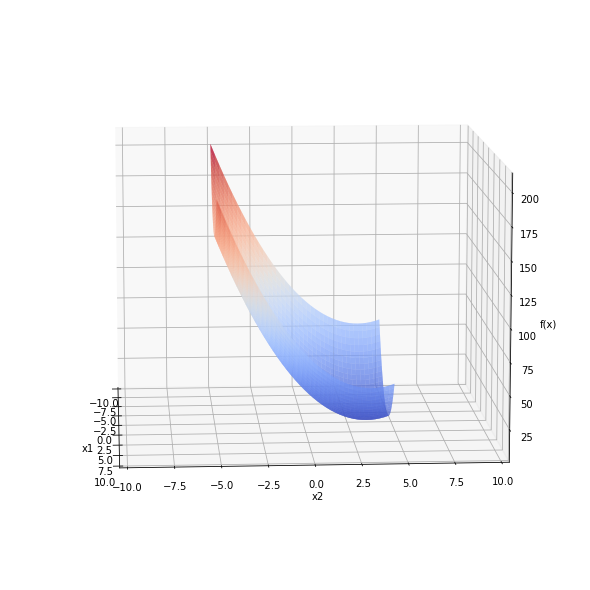

In [9]:
# plot the 3D animation to visualize if f(x) is affine or not
fig = plt.figure(figsize = (12,8))
ax = Axes3D(fig)
plt.xlim(-10,10)
plt.ylim(-10,10)

# surf = ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')

def init():
    ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm)
    return fig,
def animate(i):
    ax.view_init(elev=10, azim=3.6*i)
    return fig,
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
frames=100, interval=200, blit=True)    
HTML(ani.to_html5_video())

In [10]:
# Lets made norm(c) = norm(d)
c = np.array([[2],[4]])
d = np.array([[-2],[-4]])



X = np.arange(-3, 0.1, 0.25)
Y = np.arange(-3, 0.1, 0.25)

XX, YY = np.meshgrid(X, Y)
Z = np.array(((XX-c[0][0])**2 + (YY - c[1][0])**2) - ((XX-d[0][0])**2 + (YY - d[1][0])**2))

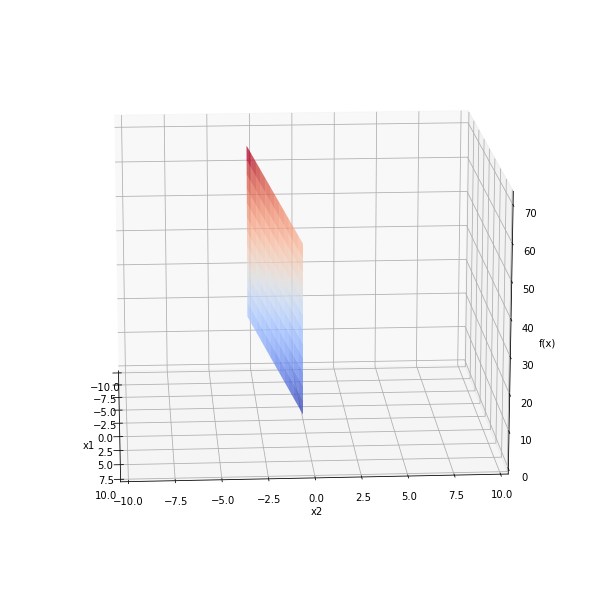

In [11]:
# plot the 3D animation to visualize if f(x) is affine or not
fig = plt.figure(figsize = (12,8))
ax = Axes3D(fig)
plt.xlim(-10,10)
plt.ylim(-10,10)

# surf = ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')

def init():
    ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm)
    return fig,
def animate(i):
    ax.view_init(elev=15, azim=3.6*i)
    return fig,
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
frames=100, interval=200, blit=True)    
HTML(ani.to_html5_video())

In [12]:
# # function which is difference of norm of (x-c)^2 and (x-d)^2

def fx(c,d, x):
    return (np.linalg.norm(x-c, 2)**2 - np.linalg.norm(x-d, 2)**2)

In [13]:
# The function works!!
x = np.array([[0],[0]])
fx(c,d, x)

0.0

In [14]:
# X and Y are two elements of x and Z is f(x)
X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array(X**2 + Y**2)
# Z = np.array(((XX-c[0][0])**2 + (YY - c[1][0])**2) - (XX-d[0][0])**2 + (YY - d[1][0])**2)

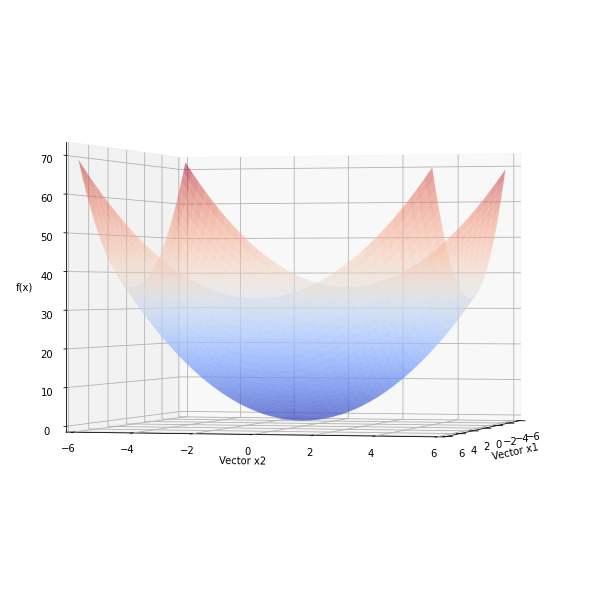

In [15]:
# plot the 3D animation to visualize if f(x) is affine or not
fig = plt.figure(figsize = (12,8))
ax = Axes3D(fig)
plt.xlim(-6,6)
plt.ylim(-6,6)

surf = ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm)
#                        linewidth=0, antialiased=False)
ax.set_xlabel('Vector x1')
ax.set_ylabel('Vector x2')
ax.set_zlabel('f(x)')

ax.view_init(elev=0, azim=15)

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values.

## Norms and Prediction Errors:


l1 norm = sum of magnitude of elements of a vector. Also know as Manhattan distance. Use case: Mean Absolute Error (MAE)

l2 norm = sum of square of vector elements. This is notion of distance we are familiar with (Euclidean distance). Use case: Root Mean Squared Error (RMSE).

l$\infty$ norm = largest absolute value in the vector.


### For a given vector:

### l$\infty$ > l2  > l1

This means MAE (l1) will never be higher than RMSE (l2) for a given vector. 

Also higher the norm index, more it focuses on larger value and neglects the smaller values in a vector  
    Ergo: RMSE (l2 norm) is more sensitive to outliers than the MAE (l1 norm). 
    

## Which one to use MAE or RMSE?

In many circumstances it makes sense to give more weight to points further away from the mean--that is, being off by 10 is more than twice as bad as being off by 5. In such cases RMSE is a more appropriate measure of error.

If being off by ten is just twice as bad as being off by 5, then MAE is more appropriate.  

The RMSE is more appropriate to represent model performance than the MAE when the error distribution is expected to be Gaussian (i.e. outliers are exponentially rare).


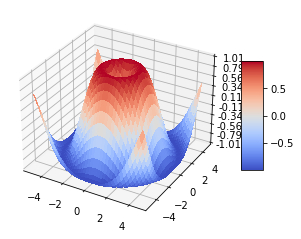

In [16]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
# Z = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [17]:
X.shape


(40, 40)

In [18]:
Y[3]

array([-4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25,
       -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25,
       -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25,
       -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25,
       -4.25, -4.25, -4.25, -4.25])

In [19]:
a = np.arange(1, 5)
b = np.arange(5, 9)
x, y = np.meshgrid(a, b)

In [20]:
x

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [21]:
y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

### Nearest unit vector. What is the nearest neighbor of the n-vector x among the unit vectors e1,...,en?


In [22]:
x = np.array([[3],[2], [5], [7]])

In [23]:
e1 = np.array([[1], [0], [0], [0]])
e2 = np.array([[0], [1],[0],[0]])
e3 = np.array([[0], [0],[1],[0]])
e4 = np.array([[0], [0],[0],[1]])

In [24]:
distance1 = np.linalg.norm(x-e1,2)
distance1

9.055385138137419

In [25]:
distance2 = np.linalg.norm(x-e2,2)
distance2

9.16515138991168

In [26]:
distance3 = np.linalg.norm(x-e3,2)
distance3

8.831760866327848

In [27]:
distance4 = np.linalg.norm(x-e4,2)
distance4

8.602325267042628

### Interpret each unit vector as the axis for the cartesian coordinates. The vector will be closest to the axis for which x has max value

In [27]:
x = (0,5)
y = (0,10)
z = (0, 3)

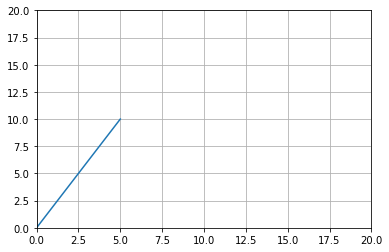

In [28]:

plt.xlim(0,20)
plt.ylim(0,20)
plt.grid(True)
plt.plot(x,y)
plt.show()

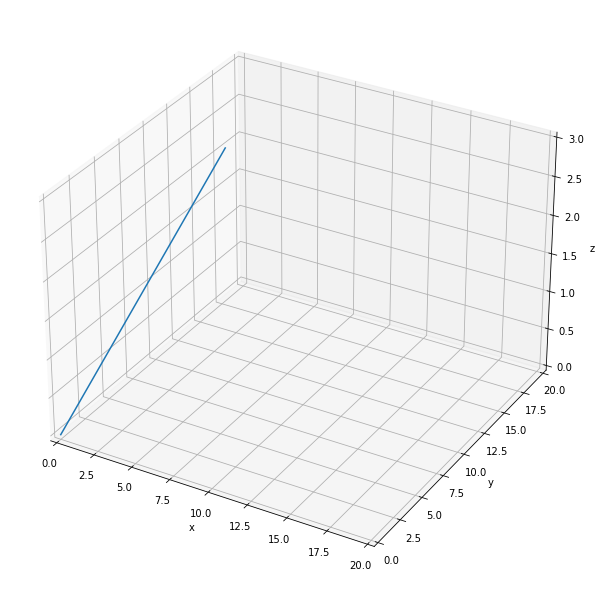

In [29]:
fig = plt.figure(figsize = (12,8))
ax = Axes3D(fig)
plt.xlim(0,20)
plt.ylim(0,20)



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(x, y, z)

## Look up the index for largest element in x. The unit vector with that index will be the closest unit vector

_____

## 3.15 Average, RMS value, and standard deviation. Use the formula (3.5) to show that for any vector x, the following two inequalities hold:
| avg(x)| ≤ rms(x), std(x) ≤ rms(x).  
Is it possible to have equality in these inequalities? If | avg(x)| = rms(x) is possible, give
the conditions on x under which it holds. Repeat for std(x) = rms(x).

rms(x)2 = avg(x)2 + std(x)2 

It seems like right angle triangle.   


Hypotenuse = RMS  
Adjacent sides are mean and std.  

Geometric proof:

https://upload.wikimedia.org/wikipedia/commons/a/a1/QM_AM_GM_HM_inequality_visual_proof.svg

# Visual Proof of inquality
![title](inequality_visual_proof.png)

### 3.16 Effect of scaling and offset on average and standard deviation. Suppose x is an n-vector and α and β are scalars.  
(a) Show that avg(αx + β1) = α avg(x) + β.  
(b) Show that std(αx + β1) = |α| std(x).  

In [30]:
from numpy import mean, sqrt, square, arange
import numpy as np


In [31]:
x = np.array([2,3,5,6])

In [32]:
x.mean()

4.0

In [33]:
x.std()

1.5811388300841898

In [34]:
rms = sqrt(mean(square(x)))
rms

4.301162633521313

In [66]:
x = x + 2
x

array([6, 8])

In [67]:
x.mean()

7.0

In [68]:
x.std()

1.0

In [69]:
rms = sqrt(mean(square(x)))
rms

7.0710678118654755

In [73]:
# Normal Distribution with mean 100 and std dev 20
mu = 100
sd = 20
dist = np.random.normal(mu, sd, 100)

#### What is effect of multiplying all the elements of a vector by a scalar

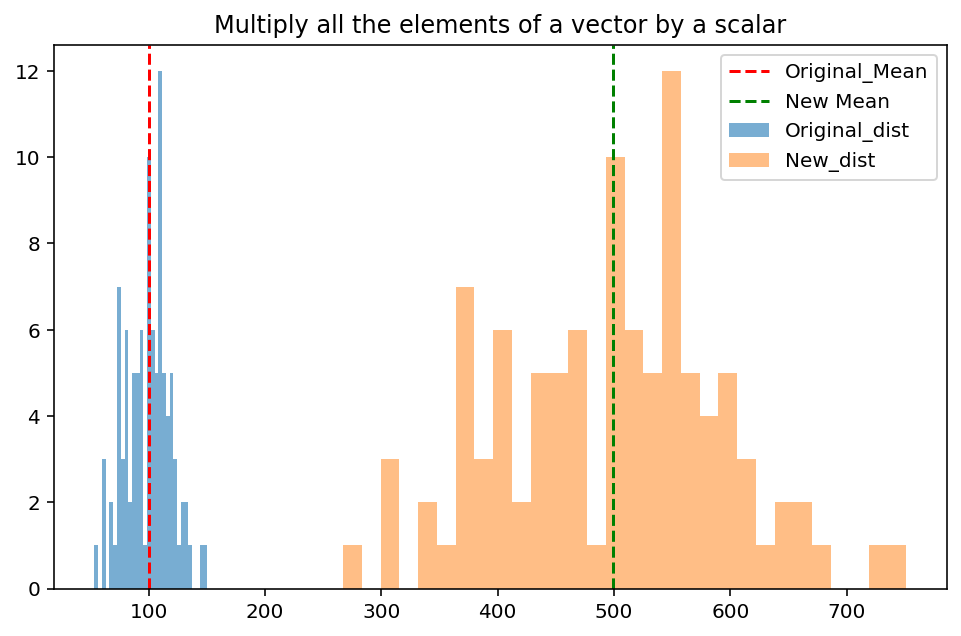

In [75]:
plt.figure(figsize = (8,5))
# Original Distribution
plt.hist(dist, bins = 30, alpha = 0.6, label = 'Original_dist')
plt.axvline(mu, color = 'r', ls = '--', label = 'Original_Mean')


# New Distribution
dist_1 = dist * 5 #Multiply by 5

plt.hist(dist_1, bins = 30, alpha = 0.5, label = 'New_dist')
plt.axvline(dist_1.mean(), color = 'g', ls = '--', label = 'New Mean')
plt.legend()
plt.title('Multiply all the elements of a vector by a scalar');

##### Effect of multiplying all the elements of a vector by a scalar
    - Mean of the distribution shifts (new mean = mean * scalar)
    - Multiplying a vector by a scalar multiplies the standard deviation by the absolute value of the scalar.

#### What is effect of adding a scalar to all the elements of a vector

In [41]:
dist_2 = dist + 50

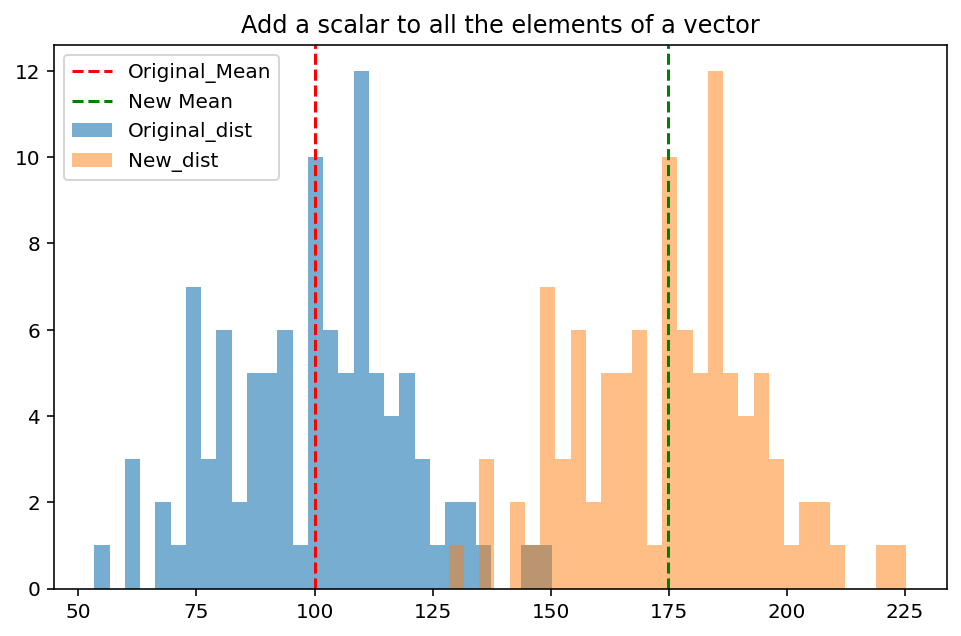

In [76]:

plt.figure(figsize = (8,5))
# Original Distribution
plt.hist(dist, bins = 30, alpha = 0.6, label = 'Original_dist')
plt.axvline(mu, color = 'r', ls = '--', label = 'Original_Mean')


# New Distribution
dist_2 = dist + 75 # add 75 to each element of vector

plt.hist(dist_2, bins = 30, alpha = 0.5, label = 'New_dist')
plt.axvline(dist_2.mean(), color = 'g', ls = '--', label = 'New Mean')
plt.legend()
plt.title('Add a scalar to all the elements of a vector');


##### Effect of adding scalar to all the elements of a vector
    - Mean of the distribution shifts (new mean = mean + scalar)
    - The std dev does not change

### 3.18 Triangle equality. When does the triangle inequality hold with equality, i.e., what are the conditions on a and b to have ∥a+b∥ = ∥a∥+∥b∥?

The equality holds when vectors are parallel

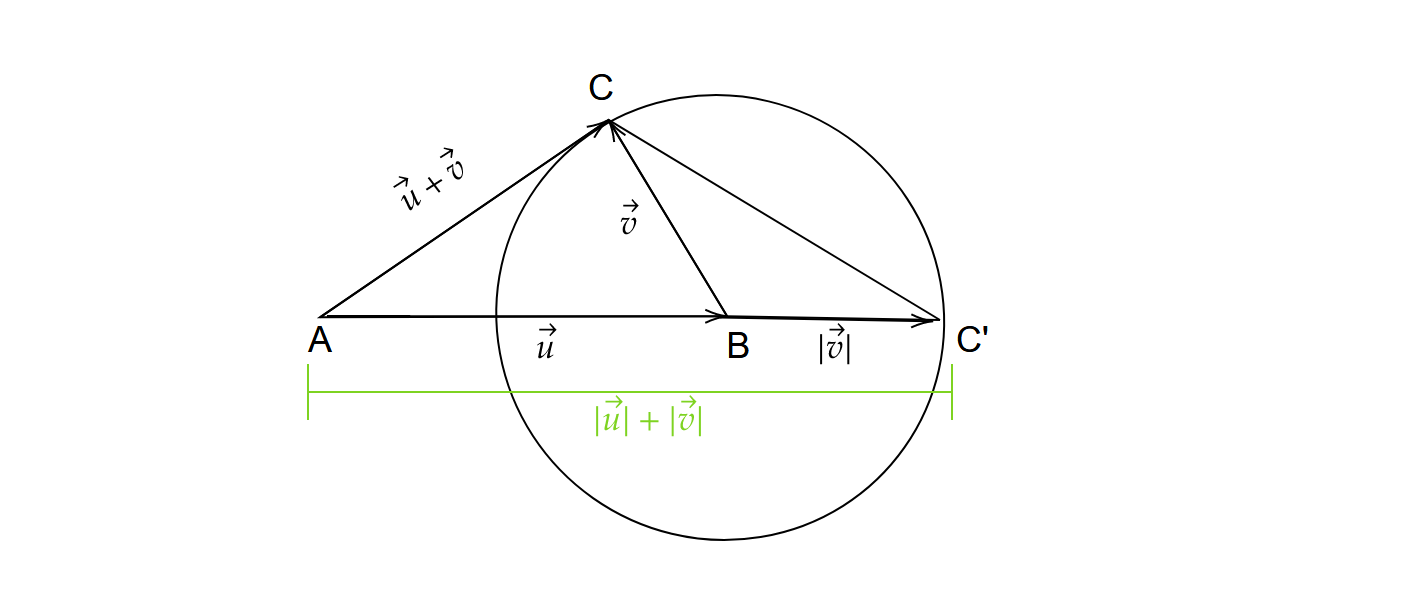


#### 3.19 Norm of sum. Use the formulas (3.1) and (3.6) to show the following:  
(a) a ⊥ b if and only if ∥a+b∥ = 􏰕∥a∥2 +∥b∥2.  
(b) Nonzero vectors a and b make an acute angle if and only if ∥a + b∥ > 􏰕∥a∥2 + ∥b∥2 .  
(c) Nonzero vectors a and b make an obtuse angle if and only if ∥a+b∥ < 􏰕∥a∥2 + ∥b∥2.

∥a+b∥2 = ∥a∥2 +2aTb+∥b∥2


aT b = ∥a∥ ∥b∥ cos θ.


cos(90) = 0



#### 3.20 Regression model sensitivity. Consider the regression model yˆ = xT β + v, where yˆ is the prediction, x is a feature vector, β is a coefficient vector, and v is the offset term. If x and x ̃ are feature vectors with corresponding predictions yˆ and y ̃, show that |yˆ−y ̃| ≤ ∥β∥∥x−x ̃∥. This means that when ∥β∥ is small, the prediction is not very sensitive to a change in the feature vector.

#### 3.22 Distance from Palo Alto to Beijing. 

The surface of the earth is reasonably approximated as a sphere with radius R = 6367.5km. A location on the earth’s surface is traditionally given by its latitude θ and its longitude λ, which correspond to angular distance from the equator and prime meridian, respectively. The 3-D coordinates of the location are given by:   
􏰎 Rsinλcosθ  
􏰏 Rcosλcosθ  
Rsinθ    

(In this coordinate system (0, 0, 0) is the center of the earth, R(0, 0, 1) is the North pole, and R(0, 1, 0) is the point on the equator on the prime meridian, due south of the Royal Observatory outside London.)

The distance through the earth between two locations (3-vectors) a and b is ∥a − b∥. The distance along the surface of the earth between points a and b is R̸ (a, b).  
Find these two distances between Palo Alto and Beijing, with latitudes and longitudes given below.

    City      Latitude θ       Longitude λ   
    Beijing   39.914◦           116.392◦  
    Palo Alto  37.429           −122.138  



In [43]:
# Step 1. Find the three vectors elements for each city (convert degress in radians)

R = 6367.5

# Beijing coordinates
b = np.array((R * math.sin(116.392 * math.pi/180) * math.cos(39.914 * math.pi/180), R * math.cos(116.392 * math.pi/180) * math.cos(39.914 * math.pi/180), R * math.sin(39.914 * math.pi/180)))

# Palo Alto coordinates
p = np.array((R * math.sin(-122.138 * math.pi/180) * math.cos(37.429 * math.pi/180), R * math.cos(-122.138  * math.pi/180) * math.cos(37.429 * math.pi/180), R * math.sin(37.429 * math.pi/180)))


In [44]:
# 3D coordinates for Beijing and Palo Alto
b, p

(array([ 4374.89306899, -2170.95445797,  4085.6240192 ]),
 array([-4281.66943679, -2689.84496969,  3870.02546801]))

In [45]:
# Step 2. Find angle between the two vectors 

# aT b = ∥a∥∥b∥ cos(a, b)

angle = math.acos(np.dot(b,p)/((np.linalg.norm(b,2) * np.linalg.norm(p,2))))
angle

1.4987362001776787

In [46]:
# Step 3. calculate distance along the surface of earth by multiplying angle and radius of earth

distance = round(angle * R,1)
print(f' The distance between Beijing and Palo Alto is {distance} km')

 The distance between Beijing and Palo Alto is 9543.2 km


#### 3.23 Angle between two nonnegative vectors.
Let x and y be two nonzero n-vectors with nonnegative entries, i.e., each xi ≥ 0 and each yi ≥ 0. Show that the angle between x and y lies between 0 and 90 . Draw a picture for the case when n = 2, and give a short geometric explanation. When are x and y orthogonal?


In [47]:
# Lets take two arbitary non-negative vectors (n = 2)
x = np.array([4,6])
y = np.array([8,3])

In [48]:
# Find angle between two vectors
angle_xy = math.acos(np.dot(x,y)/((np.linalg.norm(y,2) * np.linalg.norm(x,2))))
angle_xy

0.6240230529767566

In [49]:
a = [0, x[0]]
b = [0, x[1]]

c = [0, y[0]]
d = [0, y[1]]

Text(8, 3.5, 'y')

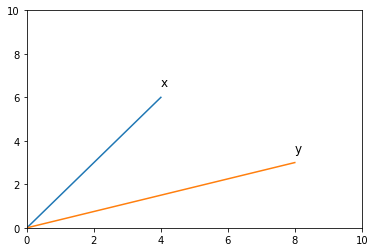

In [50]:
plt.plot(a, b)
plt.plot(c, d)
plt.xlim(0,10)
plt.ylim(0,10)
plt.text(x[0],x[1]+0.5, 'x', fontsize = 12)
plt.text(y[0],y[1]+0.5, 'y', fontsize = 12)

Since both x and y lies in first quadrant, the angle between them will always be < 90 (acute)

#### When are x and y orthogonal?
For n = 2, when one element of each vector, x and y, is zero.



#### 3.24 Distance versus angle nearest neighbor.

Suppose z1, . . . , zm is a collection of n-vectors, and x is another n-vector. The vector zj is the (distance) nearest neighbor of x (among the given vectors) if  
∥x−zj∥ ≤ ∥x−zi∥, i = 1,...,m,  
i.e., x has smallest distance to zj . We say that zj is the angle nearest neighbor of x if  
̸ (x,zj) ≤ ̸ (x,zi), i = 1,...,m, i.e., x has smallest angle to zj .

(a) Give a simple specific numerical example where the (distance) nearest neighbor is not the same as the angle nearest neighbor.  

(b) Now suppose that the vectors z1, . . . , zm are normalized, which means that ∥zi∥ = 1, i = 1,...,m. Show that in this case the distance nearest neighbor and the angle nearest neighbor are always the same. Hint. You can use the fact that arccos is a decreasing function, i.e., for any u and v with −1 ≤ u < v ≤ 1, we have arccos(u) > arccos(v).

In [51]:
x = np.array([4,6])
z1 = np.array([6,4])
z2 = np.array([7,8])


In [52]:
a = [0, x[0]]
b = [0, x[1]]

c = [0, z1[0]]
d = [0, z1[1]]


e = [0, z2[0]]
f = [0, z2[1]]


Text(7, 8.5, 'z2 = [7 8]')

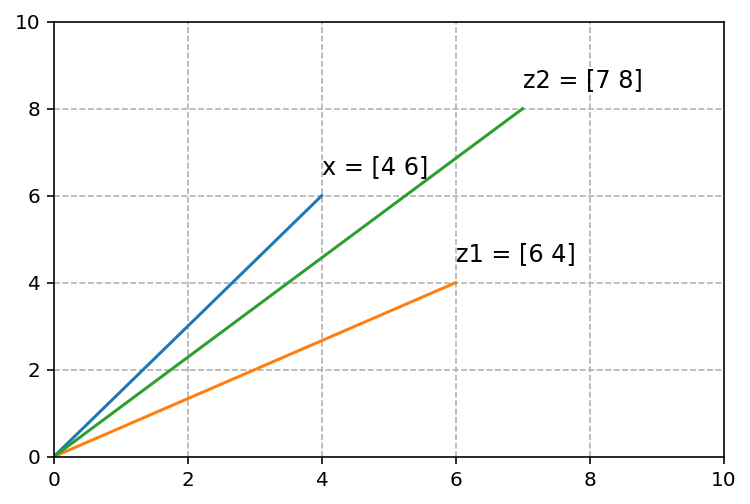

In [53]:
%config InlineBackend.figure_format ='retina'
plt.plot(a, b)
plt.plot(c, d)
plt.plot(e, f)
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid(True, ls = '--')
plt.text(x[0],x[1]+0.5, 'x = {}'.format(x), fontsize = 12)
plt.text(z1[0],z1[1]+0.5, 'z1 = {}'.format(z1), fontsize = 12)
plt.text(z2[0],z2[1]+0.5, 'z2 = {}'.format(z2), fontsize = 12)

In [54]:
#distance between x and z1 is given by

print("{:.2f}".format(np.linalg.norm((x - z1),2)))

2.83


In [65]:
#distance between x and z1 is given by

print("{:.2f}".format(np.linalg.norm((x - z2),2)))

3.61


In [56]:
#Calculate angle between x and z1
angle_x_z1 = math.acos(np.dot(x,z1)/((np.linalg.norm(x,2) * np.linalg.norm(z1,2))))
print("{:.2f} radians".format(angle_x_z1))

0.39 radians


In [57]:
#Calculate angle between x and z2
angle_x_z2 = math.acos(np.dot(x,z2)/((np.linalg.norm(x,2) * np.linalg.norm(z2,2))))
print("{:.2f} radians".format(angle_x_z2))

0.13 radians


#### In the example above, while z1 is the nearest distance neighbour of x, the nearest angle neighbour of x is z2

In [58]:
# Normalize z1
z1_norm = z1/np.linalg.norm(z1,2)
z1_norm

array([0.83205029, 0.5547002 ])

In [59]:
# Normalize z2
z2_norm = z2/np.linalg.norm(z2,2)
z2_norm

array([0.65850461, 0.75257669])

In [60]:
#distance between x and z1_norm is given by

print("{:.2f}".format(np.linalg.norm((x - z1_norm),2)))

6.30


In [64]:
#distance between x and z2_norm is given by

print("{:.2f}".format(np.linalg.norm((x - z2_norm),2)))

6.22


In [62]:
#Calculate angle between x and z1_norm
angle_x_z1_norm = math.acos(np.dot(x,z1_norm)/((np.linalg.norm(x,2) * np.linalg.norm(z1_norm,2))))
print("{:.2f} radians".format(angle_x_z1_norm))

0.39 radians


In [63]:
#Calculate angle between x and z2_norm
angle_x_z2_norm = math.acos(np.dot(x,z2_norm)/((np.linalg.norm(x,2) * np.linalg.norm(z2_norm,2))))
print("{:.2f} radians".format(angle_x_z2_norm))

0.13 radians


#### In the example above, z2_norm is the nearest distance neighbour of x, as well as nearest angle neighbour of x.

_____________________________________
#### 3.25 Leveraging.
Consider an asset with return time series over T periods given by the T- vector r. This asset has mean return μ and risk σ, which we assume is positive. We also consider cash as an asset, with return vector μrf 1, where μrf is the cash interest rate per period. Thus, we model cash as an asset with return μrf and zero risk. (The superscript in μrf stands for ‘risk-free’.) We will create a simple portfolio consisting of the asset and cash. If we invest a fraction θ in the asset, and 1 − θ in cash, our portfolio return is given by the time series  

p = θr + (1 − θ)μrf 1.  

We interpret θ as the fraction of our portfolio we hold in the asset. We allow the choices θ > 1, or θ < 0. In the first case we are borrowing cash and using the proceeds to buy more of the asset, which is called leveraging. In the second case we are shorting the asset. When θ is between 0 and 1 we are blending our investment in the asset and cash, which is a form of hedging.

(a) Derive a formula for the return and risk of the portfolio, i.e., the mean and standard deviation of p. These should be expressed in terms of μ, σ, μrf, and θ. Check your formulas for the special cases θ = 0 and θ = 1.


Mean return of asset : μ 
Return (mean) of the portfolio is the average of the vector p


return = average(p) = average(θr + (1 − θ)μrf 1)  
=  θ * average(r) + (1 − θ)μrf avg(1)  
= θμ + (1−θ)μrf.

Std Dev. Since cash is risk free, it is intutive that overall risk for portolio is theta * sigma i.e.
std(p) = |θ|σ


(b) Explain how to choose θ so the portfolio has a given target risk level σtar (which is positive). If there are multiple values of θ that give the target risk, choose the one that results in the highest portfolio return.